Data Info:The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

Objective:Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” 
- Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

In [342]:
#importing libraries

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
#loading the dataset

In [345]:
df = pd.read_excel(r"D:\aspiring_minds_employability_outcomes_2015.xlsx")

In [346]:
df_o =df.copy()

In [347]:
#checking the first five rows of the dataset

In [348]:
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [349]:
df.shape

(3998, 39)

In [350]:
##The dataset contains 3998 rows and 39 columns

In [351]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [352]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [353]:
df.head(2)

ID  Salary        DOJ      DOL              Designation    JobCity  \
0  203097  420000 2012-06-01  present  senior quality engineer  Bangalore   
1  579905  500000 2013-09-01  present        assistant manager     Indore   

  Gender        DOB  10percentage                         10board  ...  \
0      f 1990-02-19          84.3  board ofsecondary education,ap  ...   
1      m 1989-10-04          85.4                            cbse  ...   

   ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1             -1           -1         -1   
1               -1              -1             -1           -1         -1   

  conscientiousness agreeableness  extraversion  nueroticism  \
0            0.9737        0.8128        0.5269       1.3549   
1           -0.7335        0.3789        1.2396      -0.1076   

   openess_to_experience  
0                -0.4455  
1                 0.8637  

[2 rows x 38 columns]

In [354]:
df.set_index(['ID']).head(2)

Salary        DOJ      DOL              Designation    JobCity Gender  \
ID                                                                              
203097  420000 2012-06-01  present  senior quality engineer  Bangalore      f   
579905  500000 2013-09-01  present        assistant manager     Indore      m   

              DOB  10percentage                         10board  12graduation  \
ID                                                                              
203097 1990-02-19          84.3  board ofsecondary education,ap          2007   
579905 1989-10-04          85.4                            cbse          2007   

        ...  ComputerScience MechanicalEngg  ElectricalEngg  TelecomEngg  \
ID      ...                                                                
203097  ...               -1             -1              -1           -1   
579905  ...               -1             -1              -1           -1   

       CivilEngg conscientiousness  agreeableness  extraversion  nueroticism  \
ID                                                                             
203097        -1            0.9737         0.8128        0.5269       1.3549   
579905        -1           -0.7335         0.3789        1.2396      -0.1076   

       openess_to_experience  
ID                            
203097               -0.4455  
579905                0.8637  

[2 rows x 37 columns]

In [355]:
#checking the datatypes of the columns

In [356]:
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [357]:
#getting the mean,standard deviation,minimum,maximum values and the quartiles info

In [358]:
round(df.describe()).T

count      mean       std      min       25%  \
ID                     3998.0  663795.0  363218.0  11244.0  334284.0   
Salary                 3998.0  307700.0  212737.0  35000.0  180000.0   
10percentage           3998.0      78.0      10.0     43.0      72.0   
12graduation           3998.0    2008.0       2.0   1995.0    2007.0   
12percentage           3998.0      74.0      11.0     40.0      66.0   
CollegeID              3998.0    5157.0    4802.0      2.0     494.0   
CollegeTier            3998.0       2.0       0.0      1.0       2.0   
collegeGPA             3998.0      71.0       8.0      6.0      66.0   
CollegeCityID          3998.0    5157.0    4802.0      2.0     494.0   
CollegeCityTier        3998.0       0.0       0.0      0.0       0.0   
GraduationYear         3998.0    2012.0      32.0      0.0    2012.0   
English                3998.0     502.0     105.0    180.0     425.0   
Logical                3998.0     502.0      87.0    195.0     445.0   
Quant                  3998.0     513.0     122.0    120.0     430.0   
Domain                 3998.0       1.0       0.0     -1.0       0.0   
ComputerProgramming    3998.0     353.0     205.0     -1.0     295.0   
ElectronicsAndSemicon  3998.0      95.0     158.0     -1.0      -1.0   
ComputerScience        3998.0      91.0     175.0     -1.0      -1.0   
MechanicalEngg         3998.0      23.0      98.0     -1.0      -1.0   
ElectricalEngg         3998.0      16.0      88.0     -1.0      -1.0   
TelecomEngg            3998.0      32.0     105.0     -1.0      -1.0   
CivilEngg              3998.0       3.0      37.0     -1.0      -1.0   
conscientiousness      3998.0      -0.0       1.0     -4.0      -1.0   
agreeableness          3998.0       0.0       1.0     -6.0      -0.0   
extraversion           3998.0       0.0       1.0     -5.0      -1.0   
nueroticism            3998.0      -0.0       1.0     -3.0      -1.0   
openess_to_experience  3998.0      -0.0       1.0     -7.0      -1.0   

                            50%       75%        max  
ID                     639600.0  990480.0  1298275.0  
Salary                 300000.0  370000.0  4000000.0  
10percentage               79.0      86.0       98.0  
12graduation             2008.0    2009.0     2013.0  
12percentage               74.0      83.0       99.0  
CollegeID                3879.0    8818.0    18409.0  
CollegeTier                 2.0       2.0        2.0  
collegeGPA                 72.0      76.0      100.0  
CollegeCityID            3879.0    8818.0    18409.0  
CollegeCityTier             0.0       1.0        1.0  
GraduationYear           2013.0    2014.0     2017.0  
English                   500.0     570.0      875.0  
Logical                   505.0     565.0      795.0  
Quant                     515.0     595.0      900.0  
Domain                      1.0       1.0        1.0  
ComputerProgramming       415.0     495.0      840.0  
ElectronicsAndSemicon      -1.0     233.0      612.0  
ComputerScience            -1.0      -1.0      715.0  
MechanicalEngg             -1.0      -1.0      623.0  
ElectricalEngg             -1.0      -1.0      676.0  
TelecomEngg                -1.0      -1.0      548.0  
CivilEngg                  -1.0      -1.0      516.0  
conscientiousness           0.0       1.0        2.0  
agreeableness               0.0       1.0        2.0  
extraversion                0.0       1.0        3.0  
nueroticism                -0.0       1.0        3.0  
openess_to_experience      -0.0       1.0        2.0

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [360]:
import datetime as dt

In [361]:
df['DOL'].replace('present',dt.datetime.today(),inplace=True)

In [362]:
#the datatype of DOL column is object.
#Changing the datatype to datetime format

In [363]:
df['DOL'] = pd.to_datetime(df['DOL'])

In [364]:
df['10board'].value_counts().head(40)

cbse                                               1395
state board                                        1164
0                                                   350
icse                                                281
ssc                                                 122
up board                                             85
matriculation                                        38
rbse                                                 23
board of secondary education                         20
up                                                   19
mp board                                             17
wbbse                                                16
sslc                                                 16
central board of secondary education                 13
kseeb                                                12
upboard                                              11
maharashtra state board                              11
karnataka state board                           

In [365]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [366]:
#from the above we can observe that there are some duplications regarding board,i.e cbse, central board of secondary education,cbse[gulf zone] etc come under cbse.So we combine all of them to cbse


In [367]:
#From the valuecounts of 10th board we can observe that there exists 0 which means the board is unknown and some are of count 1
#So we replace the 0 and other boards whose value counts are very less.

In [368]:
df['10board'].replace([ 'cbse', 'cbse[gulf zone]','new delhi', 'cbse board','central board of secondary education'], 'cbse',inplace=True)

In [369]:
df['10board'].replace("cicse","icse",inplace=True)

In [370]:
#replacing all the state boards to one category -state board

In [371]:
board_10 = df['10board'].unique()
board_10_other = []
for i in board_10:
    if i == 'cbse' or i == 'icse' or i=='state board':
        continue
    else:
        board_10_other.append(i)



In [372]:
for i in board_10_other:
    df['10board'].replace(i, 'state board',inplace=True)


In [373]:
df['10board'].value_counts()

state board    2305
cbse           1411
icse            282
Name: 10board, dtype: int64

In [374]:
df['12board'].value_counts().head(40)

cbse                                                 1400
state board                                          1254
0                                                     359
icse                                                  129
up board                                               87
isc                                                    45
board of intermediate                                  36
board of intermediate education                        31
up                                                     20
rbse                                                   19
mp board                                               17
bie                                                    15
chse                                                   14
ipe                                                    14
hsc                                                    13
maharashtra state board                                12
central board of secondary education                   12
wbchse        

In [375]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [376]:
df['12board'].replace(['all india board','central board of secondary education, new delhi', 'cbese'], 'cbse',inplace=True)


In [377]:
df['12board'].replace(['isc', 'isc board', 'isce', 'cicse','isc board , new delhi'], 'icse',inplace=True)

In [378]:
board_12 = df['12board'].unique()
board_12_other = []
for i in board_12:
    if i == 'cbse' or i == 'icse':
        continue
    else:
        board_12_other.append(i)

for j in board_12_other:
    df['12board'].replace(j,'state board',inplace=True)


df['12board'].unique()

array(['state board', 'cbse', 'icse'], dtype=object)

In [379]:
#As we can see many -1 and 0 values in the dataset we replace them with NAN

In [380]:

df.replace([-1,'n/a',0],np.NaN,inplace=True)

In [381]:
df.isnull().sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              1
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

In [382]:
df['JobCity'].fillna(df['JobCity'].mode()[0], inplace=True)

In [383]:
df['Domain'].fillna(df['Domain'].mode()[0], inplace=True)


In [384]:
df['10board'].fillna(df['10board'].mode()[0], inplace=True)

In [385]:
df['12board'].fillna(df['12board'].mode()[0], inplace=True)

In [386]:
df.drop(columns=['ElectronicsAndSemicon'],axis=1,inplace=True)
df.drop(columns=['MechanicalEngg'],axis=1,inplace=True)
df.drop(columns=['ElectricalEngg'],axis=1,inplace=True)
df.drop(columns=['CivilEngg'],axis=1,inplace=True)
df.drop(columns=['ComputerScience'],axis=1,inplace=True)
df.drop(columns=['CollegeCityTier'],axis=1,inplace=True)
df.drop(columns=['TelecomEngg'],axis=1,inplace=True)

UNIVARIATE AND BIVARIATE ANALYSIS


<AxesSubplot:>

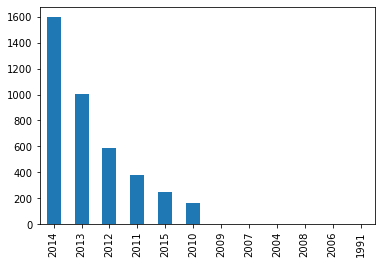

In [387]:
(df['DOJ'].dt.year).value_counts().plot(kind='bar')

In [388]:
#The year 2014 has greater number of joinings

<AxesSubplot:xlabel='10board'>

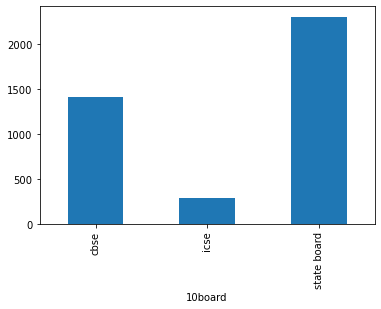

In [389]:
count = df.groupby('10board').size()
count.plot.bar()

In [390]:
#More students belong to state board

<AxesSubplot:xlabel='12board'>

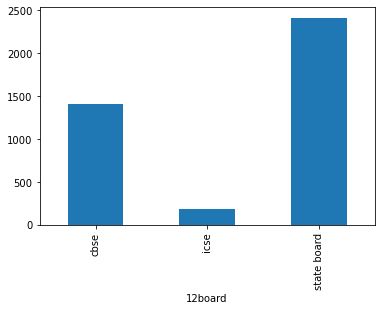

In [391]:
count_12 = df.groupby(by='12board').size()
count_12.plot.bar()

In [392]:
#More students belong to state board

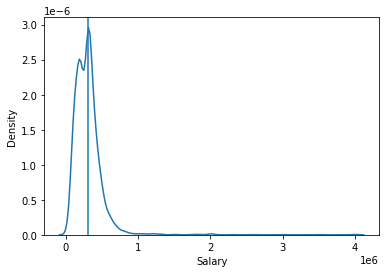

In [393]:
plt.figsize=(8,8)
sns.kdeplot(df['Salary'])
plt.axvline(df['Salary'].mean())

In [394]:
#From above plot, we see the distribution is right skewed and has Log Normal Distribution

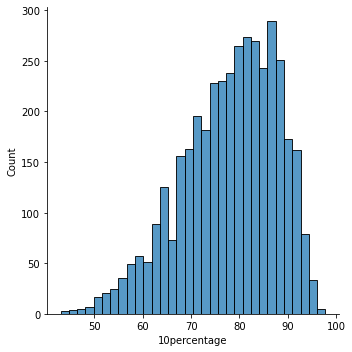

In [395]:
sns.displot(df['10percentage'])

<AxesSubplot:xlabel='10percentage', ylabel='Density'>

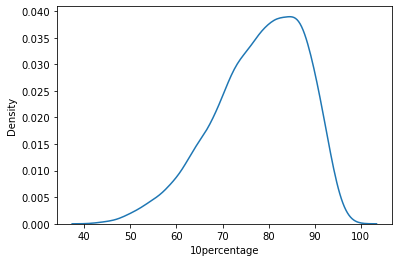

In [490]:
sns.kdeplot(df['10percentage'])

In [396]:
df['10percentage'].skew()

-0.5910185081648047

In [397]:
#The data is negatively skewed

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='12percentage', ylabel='Density'>

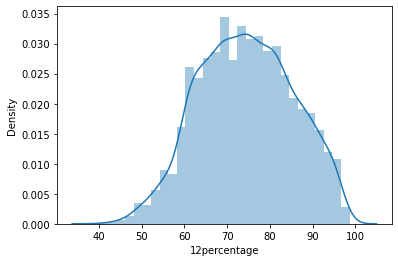

In [491]:
sns.distplot(df['12percentage'])

<AxesSubplot:xlabel='12percentage', ylabel='Density'>

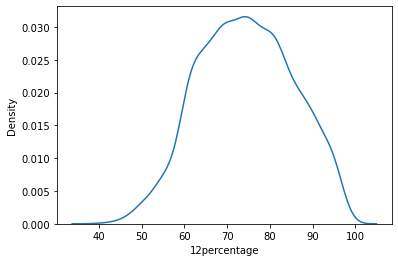

In [398]:
sns.kdeplot(df['12percentage'])

In [399]:
round(df['12percentage'].skew(),2)

-0.03

In [400]:
#data distribution has a minimal skewness.Nearly normal

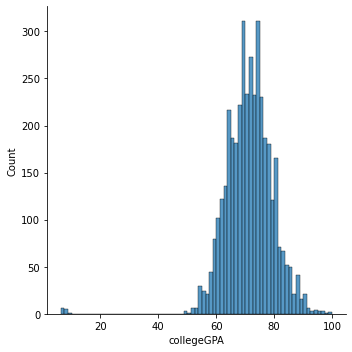

In [494]:
sns.displot(df['collegeGPA'])

<AxesSubplot:>

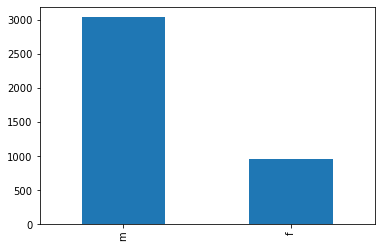

In [401]:
df['Gender'].value_counts().plot(kind='bar')

In [402]:
# m~male;f~female
#The count of male is greater than female

In [403]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

<AxesSubplot:>

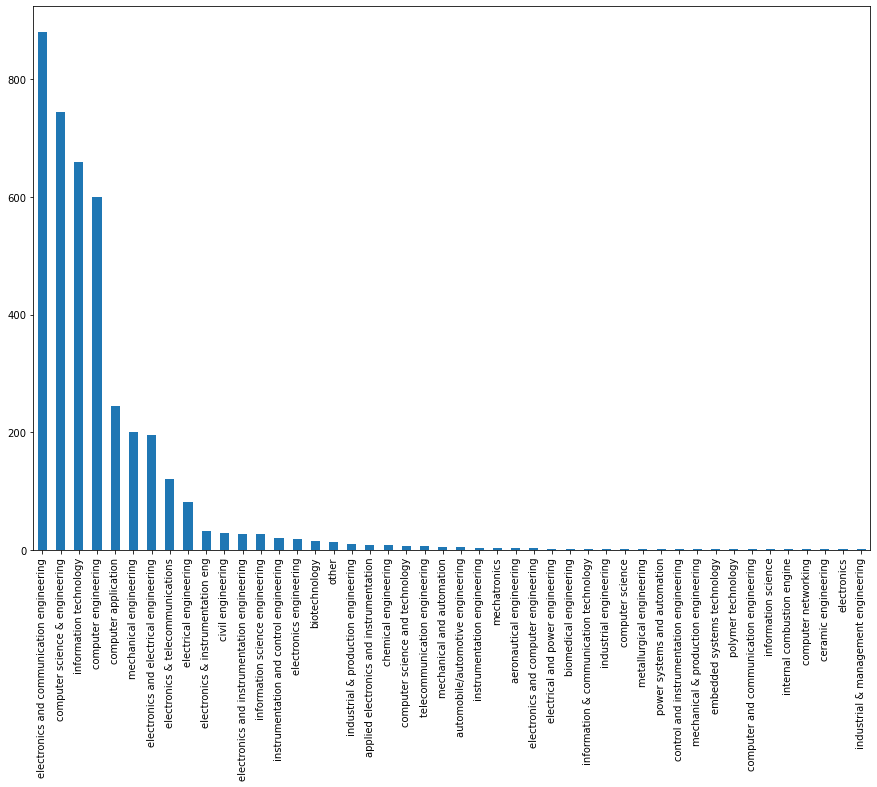

In [404]:
df['Specialization'].value_counts().plot(kind='bar',figsize=(15,10))

In [405]:
# As there are siimlar fields given under different categories we try to group them together by mapping similar entities.

In [406]:
map_specialization = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [407]:
df['Specialization'] = df['Specialization'].map(map_specialization)

<AxesSubplot:>

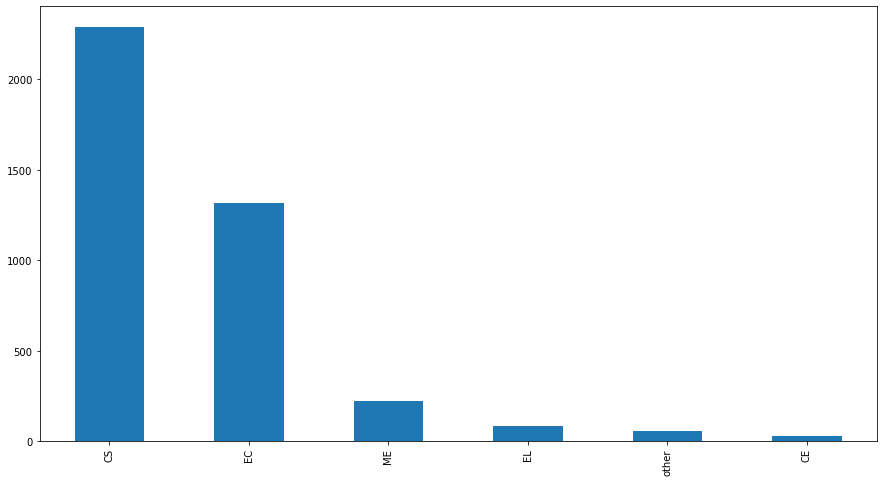

In [408]:
df['Specialization'].value_counts().plot(kind='bar',figsize=(15,8))

In [409]:
#computer science engineering specialization is the majority followed by electronics engineering.

CHECKING FOR OUTLIERS

In [410]:
def outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lb = q1-(1.5*iqr)
    ub = q3+(1.5*iqr)
    outlier = []
    for i in df[col]:
        if i<lb or i>ub:
            outlier.append(i)
    return len(outlier),outlier

In [411]:
outliers(df,'Salary')

(109,
 [1100000,
  800000,
  1500000,
  1200000,
  675000,
  1860000,
  660000,
  700000,
  785000,
  700000,
  690000,
  700000,
  1110000,
  1200000,
  1000000,
  715000,
  820000,
  720000,
  2600000,
  715000,
  800000,
  1025000,
  775000,
  1300000,
  3500000,
  910000,
  730000,
  680000,
  1300000,
  1050000,
  2000000,
  700000,
  860000,
  800000,
  800000,
  690000,
  4000000,
  2020000,
  700000,
  700000,
  760000,
  800000,
  870000,
  2050000,
  700000,
  1320000,
  755000,
  880000,
  3000000,
  700000,
  720000,
  820000,
  2500000,
  2300000,
  950000,
  1300000,
  1200000,
  4000000,
  700000,
  700000,
  1800000,
  725000,
  1200000,
  720000,
  700000,
  930000,
  680000,
  1000000,
  750000,
  1000000,
  705000,
  1745000,
  2000000,
  1800000,
  850000,
  845000,
  700000,
  660000,
  820000,
  750000,
  1200000,
  670000,
  1030000,
  770000,
  800000,
  720000,
  900000,
  1210000,
  1500000,
  1100000,
  680000,
  675000,
  700000,
  800000,
  700000,
  200000

In [412]:
outliers(df,'10percentage')

(30,
 [50.6,
  44.16,
  44.0,
  45.6,
  48.0,
  49.0,
  48.0,
  49.0,
  48.8,
  49.0,
  49.0,
  48.5,
  48.0,
  50.6,
  43.0,
  50.0,
  49.0,
  45.33,
  46.24,
  48.0,
  50.5,
  50.0,
  50.0,
  50.66,
  46.8,
  50.0,
  50.0,
  50.0,
  46.0,
  49.9])

In [413]:
outliers(df,'12percentage')

(1, [40.0])

In [414]:
outliers(df,'ComputerProgramming')

(45,
 [735.0,
  155.0,
  804.0,
  715.0,
  155.0,
  135.0,
  105.0,
  165.0,
  735.0,
  135.0,
  175.0,
  125.0,
  745.0,
  125.0,
  715.0,
  185.0,
  145.0,
  175.0,
  725.0,
  840.0,
  755.0,
  175.0,
  175.0,
  185.0,
  715.0,
  145.0,
  755.0,
  175.0,
  125.0,
  115.0,
  755.0,
  185.0,
  735.0,
  155.0,
  715.0,
  165.0,
  175.0,
  725.0,
  115.0,
  165.0,
  165.0,
  145.0,
  155.0,
  725.0,
  715.0])

In [415]:
imp_val=df['ComputerProgramming'].median()

df['ComputerProgramming'].fillna(value=imp_val, inplace=True)

<AxesSubplot:xlabel='Salary'>

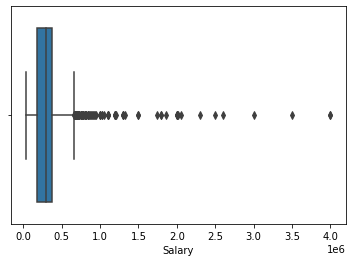

In [420]:
sns.boxplot(x='Salary',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

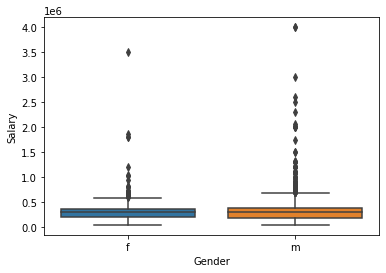

In [421]:
sns.boxplot(x='Gender',y='Salary',data=df)

In [422]:
#more number of outliers are observed in male category

Research Questions
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.
- Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

<AxesSubplot:xlabel='Specialization', ylabel='count'>

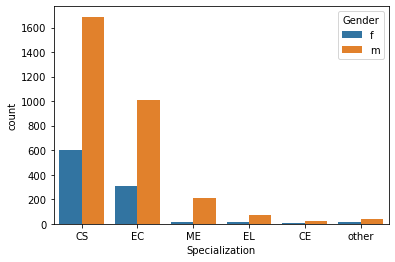

In [423]:
sns.countplot(x='Specialization',hue='Gender',data=df)

In [424]:
#computer science students are more in number and dominant with regards to gender too
# Females have less preference for CE department,ME department and departments other than CS & EC.
#CE department is less preferred by males too.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

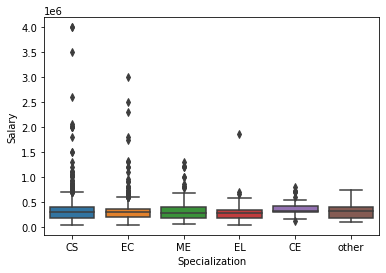

In [511]:
sns.boxplot(x='Specialization',y='Salary',data=df)

In [ ]:
#CE department students are getting higher Salary when compared to others.
#There are considerable number of outliers in the data(specialization vs salary) which is clearly visible from boxplot

<AxesSubplot:xlabel='Salary', ylabel='Specialization'>

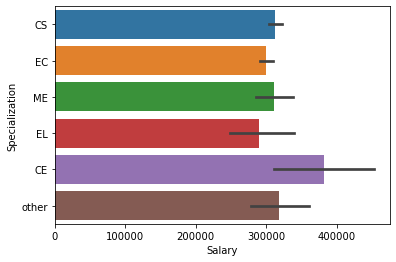

In [525]:

sns.barplot(x='Salary',y='Specialization',data=df)


#The belief that computer science specialization is the highest paying field is partially true as it remained to be the highest paying field but other specializations are also earning equally good showing no much difference betwwen the salary vs specialization which implies ''hardwork is the key to success''

<AxesSubplot:xlabel='Gender', ylabel='Specialization'>

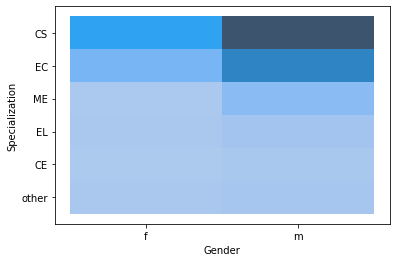

In [446]:
sns.histplot(x='Gender',y='Specialization',data=df)

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

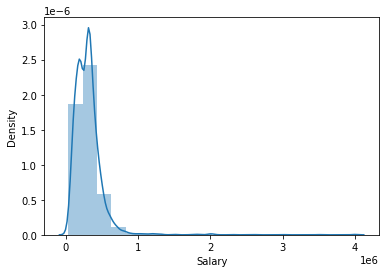

In [451]:
sns.distplot(df['Salary'],kde=True,bins=20)

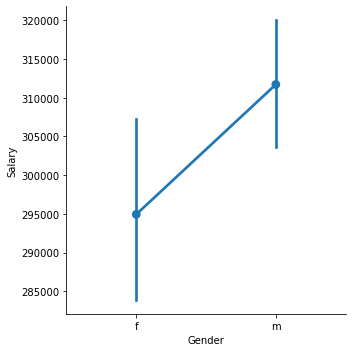

In [468]:
sns.factorplot(x='Gender',y='Salary',data=df)

In [469]:
#Salary of male aspirants is more than female

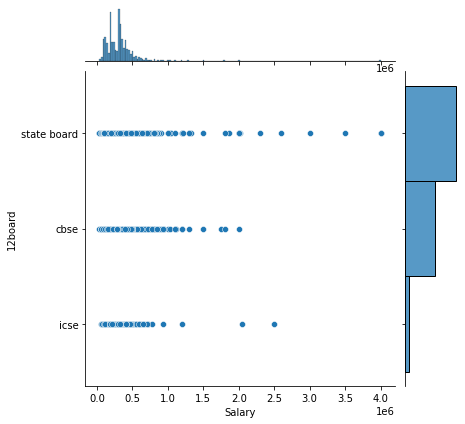

In [470]:
sns.jointplot(x='Salary',y='12board',data=df)

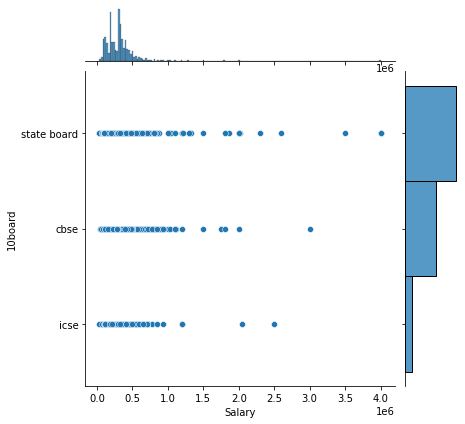

In [471]:
sns.jointplot(x='Salary',y='10board',data=df)

In [472]:
#Salary is more  for the aspirants coming from state board when compared to others

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

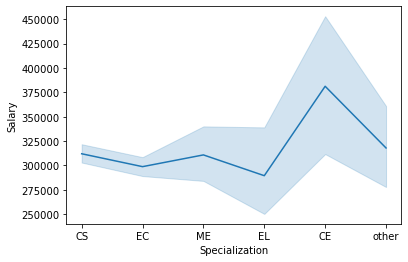

In [474]:
sns.lineplot(x='Specialization',y='Salary',data=df)

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

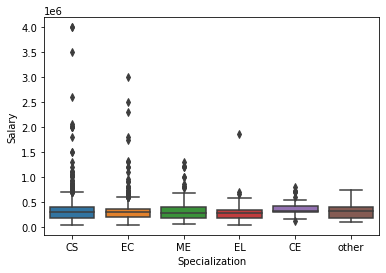

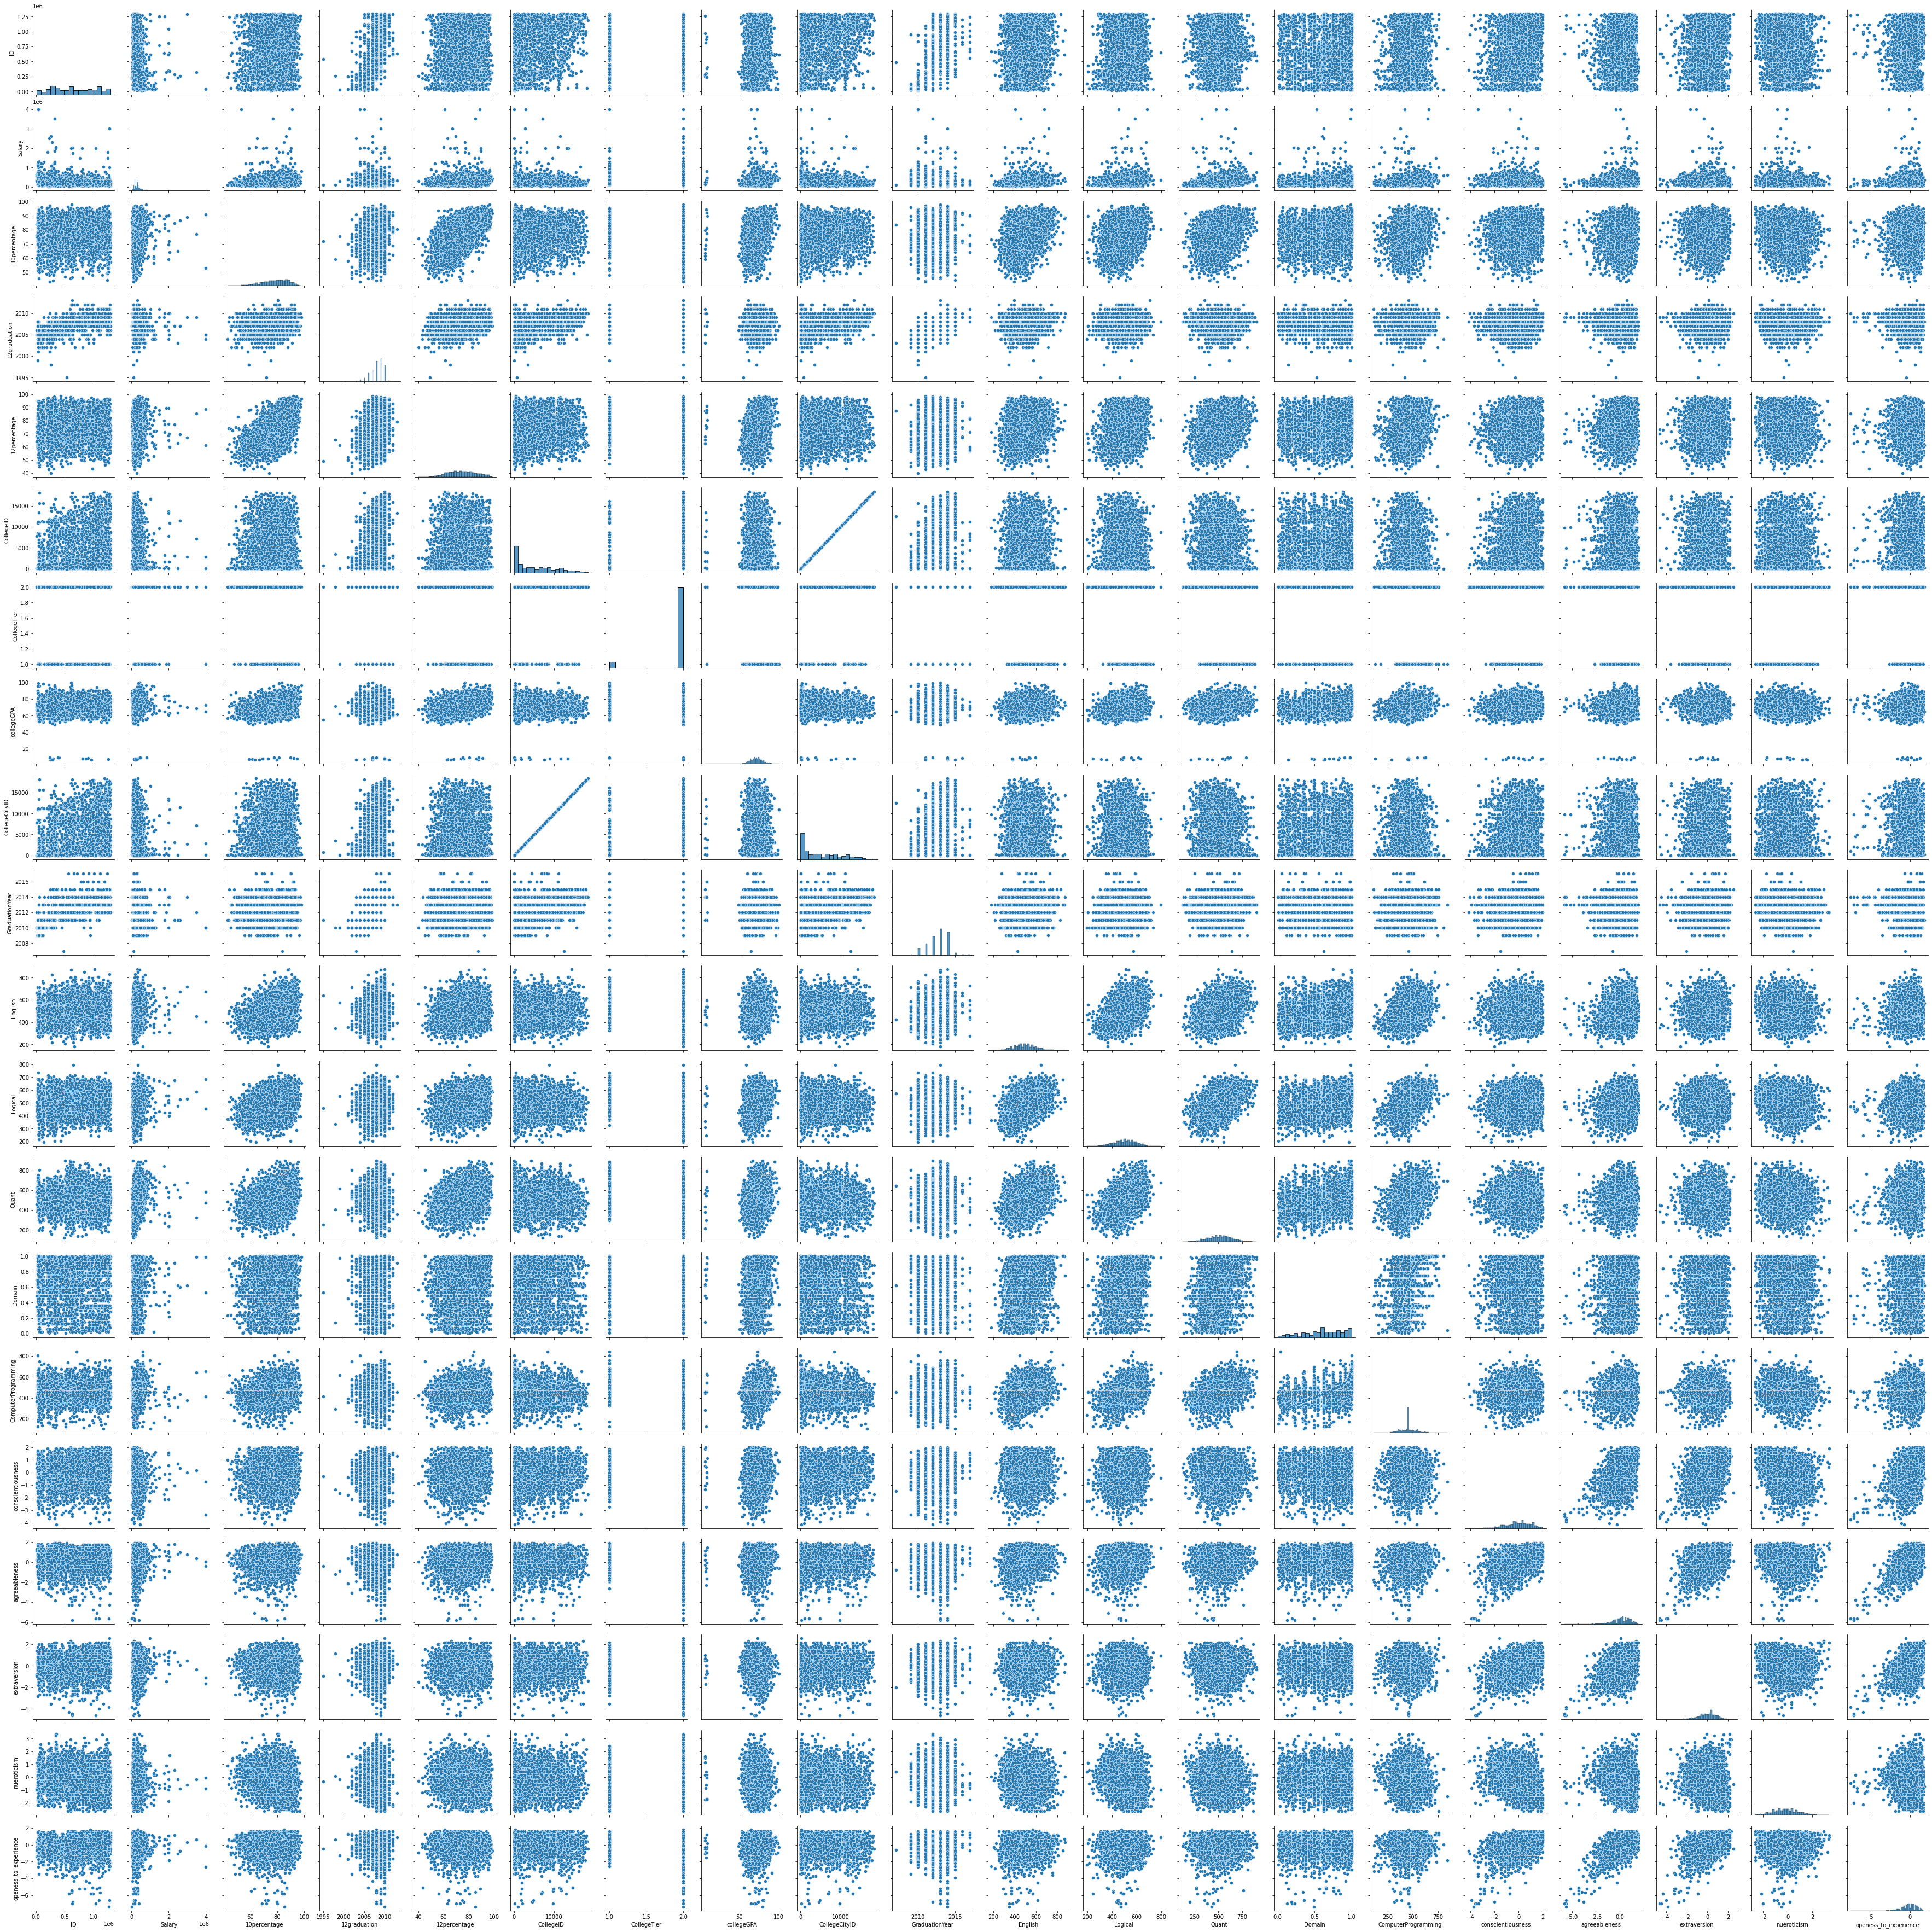

In [498]:
sns.pairplot(df)

<AxesSubplot:>

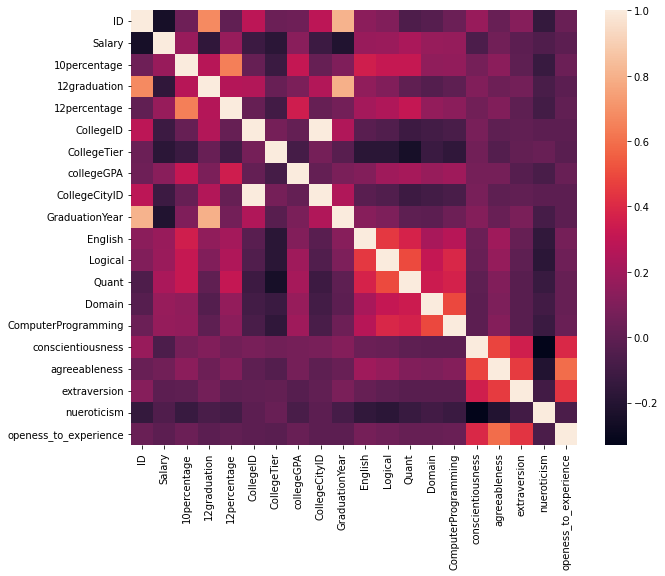

In [501]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr)

In [503]:
df[['Salary','10percentage', '12percentage', 'collegeGPA']].corr()

Salary  10percentage  12percentage  collegeGPA
Salary        1.000000      0.177373      0.170254    0.130103
10percentage  0.177373      1.000000      0.643378    0.312538
12percentage  0.170254      0.643378      1.000000    0.346137
collegeGPA    0.130103      0.312538      0.346137    1.000000

In [504]:
#Students having higher percentage of marks in 10th Class performed similarly in 12th Class(Correlation Coefficient ~0.64) .

#However correlation between marks scored and the starting salary is quite low (around 0.17) for 10th and 12th Class percentage scores and even lesser (~0.13) for College CGPA and goes against the widely accepted notation that higher grades result in higher salary.

FEATURE ENCODING

In [527]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [529]:
num_col  = pd.DataFrame()
num_col = df[['Salary','10percentage','12percentage']]


In [530]:
num_col

Salary  10percentage  12percentage
0      420000         84.30         95.80
1      500000         85.40         85.00
2      325000         85.00         68.20
3     1100000         85.60         83.60
4      200000         78.00         76.80
...       ...           ...           ...
3993   280000         52.09         55.50
3994   100000         90.00         93.00
3995   320000         81.86         65.50
3996   200000         78.72         69.88
3997   400000         70.60         68.00

[3998 rows x 3 columns]

In [532]:
scaler.fit_transform(num_col)

array([[0.09709962, 0.75420015, 0.95059625],
       [0.11727617, 0.7742878 , 0.76660988],
       [0.07313997, 0.7669832 , 0.48040886],
       ...,
       [0.07187894, 0.70964207, 0.43441227],
       [0.04161412, 0.65230095, 0.50902896],
       [0.09205549, 0.50401753, 0.4770017 ]])

In [544]:
cat_col = df[['Gender','Designation','JobCity','Specialization','10board','12board','Degree']]

In [545]:
pd.get_dummies(cat_col,drop_first=True)

Gender_m  Designation_.net web developer  Designation_account executive  \
0            0                               0                              0   
1            1                               0                              0   
2            0                               0                              0   
3            1                               0                              0   
4            1                               0                              0   
...        ...                             ...                            ...   
3993         1                               0                              0   
3994         0                               0                              0   
3995         1                               0                              0   
3996         0                               0                              0   
3997         0                               0                              0   

      Designation_account manager  Designation_admin assistant  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
3993                            0                            0   
3994                            0                            0   
3995                            0                            0   
3996                            0                            0   
3997                            0                            0   

      Designation_administrative coordinator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
3993                                       0   
3994                                       0   
3995                                       0   
3996                                       0   
3997                                       0   

      Designation_administrative support  Designation_aircraft technician  \
0                                      0                                0   
1                                      0                                0   
2                                      0                                0   
3                                      0                                0   
4                                      0                                0   
...                                  ...                              ...   
3993                                   0                                0   
3994                                   0                                0   
3995                                   0                                0   
3996                                   0                                0   
3997                                   0                                0   

      Designation_android developer  Designation_application developer  ...  \
0                                 0                                  0  ...   
1                                 0                                  0  ...   
2                                 0                                  0  ...   
3                                 0                                  0  ...   
4                                 0                                  0  ...   
...                             ...                                ...  ...   
3993                              0                                  0  ...   
3994                              0                                  0  ...   
3995                       